In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#!unzip /content/drive/MyDrive/detecting-pneumonia-using-cnn-in-pytorch.zip

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [ ]:
IMAGE_SIZE = [224,224]

In [ ]:
epochs = 50
batch_size = 16

In [ ]:
train_path = '../content/chest_xrays/train'
test_path = '../content/chest_xrays/test'
valid_path = '../content/chest_xrays/val'

In [ ]:
image_files = glob(train_path + '/*/*.jp*g')
test_image_files = glob(test_path + '/*/*.jp*g')

In [ ]:
folders = glob(train_path + '/*')

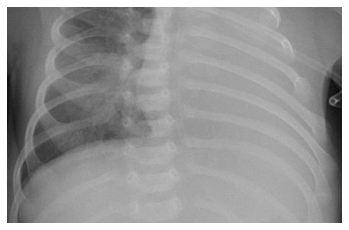

In [ ]:
plt.imshow(image.img_to_array(image.load_img(np.random.choice(image_files))).astype('uint8'))
plt.axis('off')
plt.show()

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in vgg.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(vgg.output)
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

In [ ]:
model.compile(
  loss='binary_crossentropy',
  optimizer='Adam',
  metrics=['accuracy']
)

In [ ]:
gen = ImageDataGenerator(
  rotation_range=20,
  width_shift_range=0.1,
  height_shift_range=0.1,
  shear_range=0.1,
  zoom_range=0.2,
  horizontal_flip=True,
  vertical_flip=True,
  preprocessing_function=preprocess_input
)

In [ ]:
# get label mapping for confusion matrix plot 
test_gen = gen.flow_from_directory(test_path, target_size=IMAGE_SIZE)
print(test_gen.class_indices)


labels = [None] * len(test_gen.class_indices)
for k, v in test_gen.class_indices.items():
  labels[v] = k

Found 200 images belonging to 2 classes.
{'NORMAL': 0, 'PNEUMONIA': 1}


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


min: -123.68 max: 139.11261


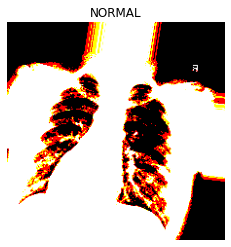

In [ ]:
for x, y in test_gen:
  print("min:", x[0].min(), "max:", x[0].max())
  plt.title(labels[np.argmax(y[0])])
  plt.imshow(x[0])
  plt.axis('off')
  plt.show()
  break

In [ ]:
# Create generators
train_generator = gen.flow_from_directory(
  train_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)

valid_generator = gen.flow_from_directory(
  test_path,
  target_size=IMAGE_SIZE,
  shuffle=True,
  batch_size=batch_size,
)

Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
r = model.fit(
  train_generator,
  validation_data=valid_generator,
  epochs=epochs,
  steps_per_epoch=len(image_files) // batch_size,
  validation_steps=len(test_image_files) // batch_size,
)

Epoch 1/50
12/12 [==============================] - 11s 920ms/step - loss: 3.6813 - accuracy: 0.7391 - val_loss: 4.2335 - val_accuracy: 0.6667
Epoch 2/50
12/12 [==============================] - 10s 866ms/step - loss: 1.9264 - accuracy: 0.8696 - val_loss: 2.7977 - val_accuracy: 0.7865
Epoch 3/50
12/12 [==============================] - 10s 857ms/step - loss: 1.0936 - accuracy: 0.9185 - val_loss: 2.1570 - val_accuracy: 0.8333
Epoch 4/50
12/12 [==============================] - 10s 858ms/step - loss: 0.8833 - accuracy: 0.9239 - val_loss: 1.6635 - val_accuracy: 0.8385
Epoch 5/50
12/12 [==============================] - 10s 851ms/step - loss: 0.7759 - accuracy: 0.9565 - val_loss: 2.3946 - val_accuracy: 0.8073
Epoch 6/50
12/12 [==============================] - 10s 862ms/step - loss: 0.8119 - accuracy: 0.9239 - val_loss: 2.6626 - val_accuracy: 0.8125
Epoch 7/50
12/12 [==============================] - 10s 867ms/step - loss: 0.2828 - accuracy: 0.9583 - val_loss: 2.1272 - val_accuracy: 0.8438

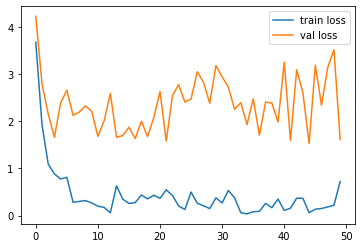

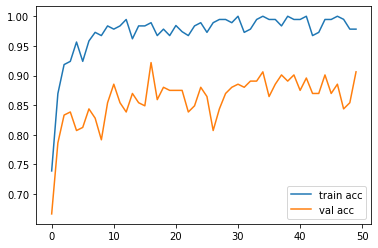

In [ ]:
# Losses
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

# Accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()